In [15]:
#Devin Fan 918042189
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/367163778.py:6: RuntimeWarning: overflow encountered in exp
  ln_psat = np.exp(A-B/(T+C))


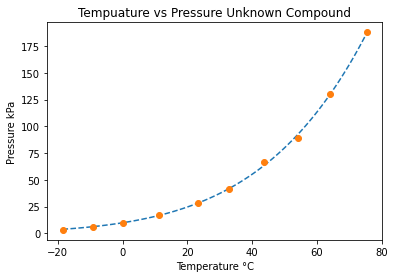

56.33122196409795


In [91]:
#Question 1
un_temp = np.array([-18.5,-9,0.2,11.3,23.4,32.8,43.5,54.2,64,75.4])
un_press = np.array([3.18,5.48,9.45,16.9,28.3,41.9,66.6,89.5,129.8,188])

def antoine(T,A,B,C):
    ln_psat = np.exp(A-B/(T+C))
    return ln_psat
def antoine_inv(P,A,B,C):
    temp = B/(A-np.log(P))-C
    return temp

est = np.array([5,3000,500])
para,ig = curve_fit(antoine,un_temp,un_press,est)

x = np.linspace(-18.5,75.4,100)
y = np.exp((para[0])-para[1]/(x+params[2]))

plt.plot(x,y,'--')
plt.plot(un_temp,un_press,'o')
bp_1_bar = antoine_inv(100,para[0],para[1],para[2])
plt.title('Tempuature vs Pressure Unknown Compound')
plt.xlabel('Temperature °C')
plt.ylabel('Pressure kPa')
plt.show()
print(bp_1_bar)

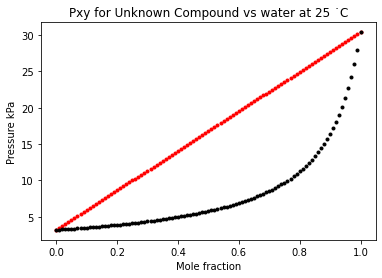

In [95]:
unknown_A = (para[0],para[1],para[2])
water = (16.3872,3885.70,230.170)
p1sat = antoine(25,*unknown_A)
p2sat = antoine(25,*water)
for mol in np.linspace(0,1,101):
  x1_mol = mol
  x2_mol = 1 - x1_mol 
  bubblep = mol_x1*p1sat + mol_x2*p2sat  
  plt.plot(mol_x1,bubblep,'.k')
  mol_y1 = mol
  dewp = 1 /(mol_y1/(p1sat) + (1-mol_y1)/(p2sat))
  plt.plot(mol_y1,dewp,'.r')
  plt.xlabel('Mole fraction')
  plt.ylabel('Pressure kPa')
  plt.title('Pxy for Unknown Compound vs water at 25 ˙C')
plt.show()

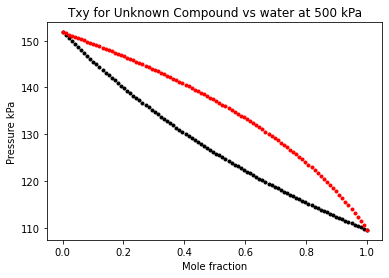

In [109]:
# Compound A properties
A_coef = unknown_A[0]
B_coef = unknown_A[1]
C_coef = unknown_A[2]

# Water properties
water_A_coef = water[0]
water_B_coef = water[1]
water_C_coef = water[2]

def BubbleT(T, x1, x2):
    # Vapor-liquid equilibrium equation for bubble point
    return x1 * np.exp(A_coef - B_coef/(T + C_coef)) + x2 * np.exp(water_A_coef - water_B_coef/(T + water_C_coef)) - 500

def DewT(T, y1, y2):
    # Vapor-liquid equilibrium equation for dew point
    return 1/(y1/np.exp(A_coef - B_coef/(T + C_coef)) + y2/np.exp(water_A_coef - water_B_coef/(T + water_C_coef))) - 500

T_bubble = np.zeros(100)
T_dew = np.zeros(100)
xmol = np.linspace(0, 1, 100)

for i in range(100):
    x1 = xmol[i]
    x2 = 1 - x1
    data_bubble = (x1, x2)
    T_bubble[i] = fsolve(BubbleT, 30, args=data_bubble)

for i in range(100):
    y1 = xmol[i]
    y2 = 1 - y1
    data_dew = (y1, y2)
    T_dew[i] = fsolve(DewT, 30, args=data_dew)

plt.plot(xmol, T_bubble, '.k')
plt.plot(xmol, T_dew, '.r')
plt.xlabel('Mole fraction')
plt.ylabel('Pressure kPa')
plt.title('Txy for Unknown Compound vs water at 500 kPa')
plt.show()


In [119]:
#Question 2

methane = (3.9895,443.028,-.49)
butane = (3.85002,909.65,-36.146)
propane = (4.53678,1149.36,24.906)

methane_press = antoine(303.15,*methane)
print('Methane Pressure:',methane_press)

propane_press = antoine(303.15,*propane)
butane_press =  antoine(303.15,*butane)
mix_press = .4*propane_press+.6*butane_press
print('Propane and Butane Mixture Pressure:',mix_press)

#750 psi = 51.7 Bar
#Pressure higher than Psat so is in liquid phase
#Minimum pressure is mixture pressure

Methane Pressure: 12.499877689823245
Propane and Butane Mixture Pressure: 2.058609499063892


/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: divide by zero encountered in log
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)


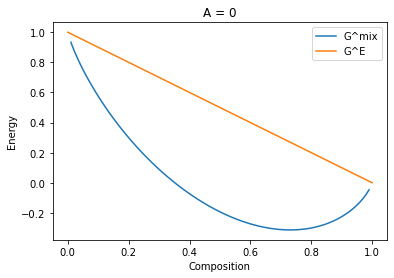

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: divide by zero encountered in log
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)


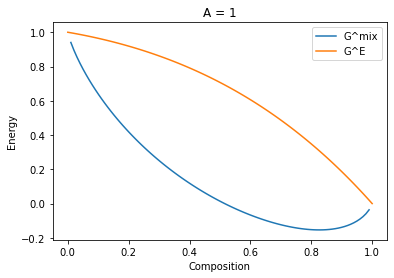

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: divide by zero encountered in log
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)


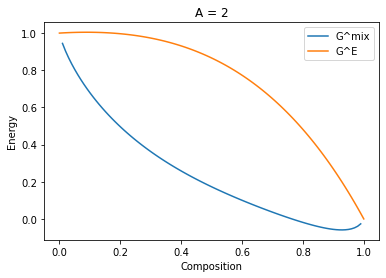

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: divide by zero encountered in log
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)


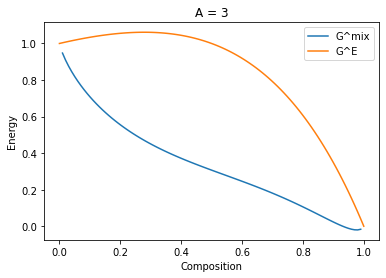

/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: divide by zero encountered in log
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
/var/folders/22/g0lkw7px703_ymv0l30dq4p80000gn/T/ipykernel_80371/3006049181.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)


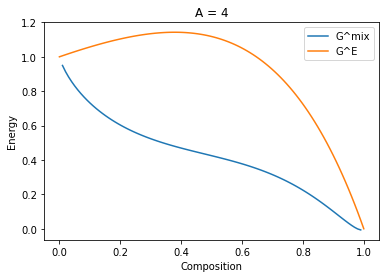

In [125]:
#Question 3
def calculate_energy_mixture(A_coefficient, title):
    composition_arr = np.linspace(0, 1, 100)
    excess_energy = np.zeros(100)
    ideal_mixing_energy = np.zeros(100)
    mixture_energy = np.zeros(100)
    
    for i in range(100):
        mole_fraction1 = composition_arr[i]
        mole_fraction2 = 1 - mole_fraction1
        
        excess_energy[i] = A_coefficient ** mole_fraction1 * mole_fraction2 
        ideal_mixing_energy[i] = mole_fraction1 * np.log(mole_fraction1) + mole_fraction2 * np.log(mole_fraction2)
        mixture_energy[i] = ideal_mixing_energy[i] + excess_energy[i]
    
    plt.plot(composition_arr, mixture_energy, label='G^mix')
    plt.plot(composition_arr, excess_energy, label='G^E')
    plt.title(title)
    plt.xlabel('Composition')
    plt.ylabel('Energy')
    plt.legend(loc='upper right')
    plt.show()

A0 = calculate_energy_mixture(1, 'A = 0')
A1 = calculate_energy_mixture(2, 'A = 1')
A2 = calculate_energy_mixture(3, 'A = 2')
A3 = calculate_energy_mixture(4, 'A = 3')
A4 = calculate_energy_mixture(5, 'A = 4')
